<a href="https://colab.research.google.com/github/sumitdua10/tensorflow/blob/master/DL_Assignment_Group109_PL9_FashionImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries/Dataset (0.25 mark)**

*   Import required libraries (recommended- use tensorflow/keras library)
*   Import the dataset (use Google Drive if required).
*   Check the GPU available (recommended- use free GPU provided by Google Colab)


In [ ]:
# Import Libraries1
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import time

# print tensorflow version
print('Tensorflow version:',tf.__version__)

#Import Dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Check if GPU available
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU not available. No device found')
else:
  print('GPU Available. GPU found at: {}'.format(device_name))


Tensorflow version: 2.3.0
GPU Available. GPU found at: /device:GPU:0


**2. Data Visualization (0.25 mark)**

a. Plot at least one sample from each class of the dataset (use matplotlib/seaborn/any other library).

b. Print the shapes of train and test data.

Shape of Train Data:  (60000, 28, 28)
Shape of Test Data:  (10000, 28, 28)


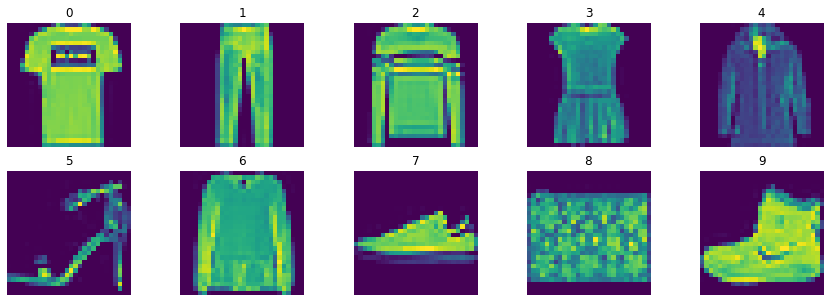

In [ ]:
#Print the shapes of train and test data
print("Shape of Train Data: ",train_images.shape)
print("Shape of Test Data: ",test_images.shape)

plt.figure(figsize=(15,5))

#Print one sample from each class.
for j in range(10):
    index = list(train_labels).index(j)
    ax = plt.subplot(2, 5, j + 1)
    plt.imshow(train_images[index])
    plt.title(int(train_labels[index]))
    plt.axis("off")


**3. Data Pre-processing (0.25 mark)**

a. Bring the train and test data in the required format.

In [ ]:
#Bring the train and test data in the required format.
train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = train_labels / 1.0
test_labels = test_labels / 1.0

**4. Model Building (0.2*5 = 1 mark)**

a. Sequential Model layers- Use AT LEAST 3 dense layers with appropriate input for each. Choose the best number for hidden units and give reasons.

b. Add L2 regularization to all the layers.

c. Add one layer of dropout at the appropriate position and give reasons.

d. Choose the appropriate activation function for all the layers.

e. Print the model summary.


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
#Selected relu function at all layers which works best with deep neural networks.
model.add(keras.layers.Dense(256, activation="relu", kernel_regularizer='L2'))
model.add(keras.layers.Dense(128, activation="relu", kernel_regularizer='L2'))
#Added one layer of dropout. It's best to dropout layers in middle layers rather than at input or output layer. Becauase at input/ouput layer important weights can be dropped.
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(64, activation="relu", kernel_regularizer='L2'))
model.add(keras.layers.Dense(10))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_41 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_______________________________________________

**5. Model Compilation (0.25 mark)**

a. Compile the model with the appropriate loss function.

b. Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.

c. Use accuracy as metric.

In [ ]:
#a Compile the model, optimizer and accuracy as metrics

'''Adam optimizer is used. Unlike in stochastic gradient algo where learning rate remains fixed, in adam algoritm, learning rate adapts.  
Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the second 
moments of the gradients (the uncentered variance). Specifically, the algorithm calculates an exponential moving average of the gradient and 
the squared gradient, and the parameters beta1 and beta2 control the decay rates of these moving averages.
'''
#Default learning rate of 0.001
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

**6. Model Training (0.5 + 0.5 = 1 mark)**

a. Train the model for an appropriate number of epochs (print the train and validation accuracy/loss for each epoch). Use the appropriate batch size.

b. Plot the loss and accuracy history graphs. Print the total time taken for training.

Epoch 1/25
800/800 [==============================] - 2s 3ms/step - loss: 1.6350 - accuracy: 0.7414 - val_loss: 0.9047 - val_accuracy: 0.8001
Epoch 2/25
800/800 [==============================] - 2s 2ms/step - loss: 0.8740 - accuracy: 0.7891 - val_loss: 0.7688 - val_accuracy: 0.8091
Epoch 3/25
800/800 [==============================] - 2s 3ms/step - loss: 0.8085 - accuracy: 0.7979 - val_loss: 0.7390 - val_accuracy: 0.8150
Epoch 4/25
800/800 [==============================] - 2s 3ms/step - loss: 0.7643 - accuracy: 0.8071 - val_loss: 0.7083 - val_accuracy: 0.8203
Epoch 5/25
800/800 [==============================] - 2s 3ms/step - loss: 0.7361 - accuracy: 0.8133 - val_loss: 0.6744 - val_accuracy: 0.8330
Epoch 6/25
800/800 [==============================] - 2s 3ms/step - loss: 0.7179 - accuracy: 0.8166 - val_loss: 0.6702 - val_accuracy: 0.8223
Epoch 7/25
800/800 [==============================] - 2s 3ms/step - loss: 0.6968 - accuracy: 0.8221 - val_loss: 0.6985 - val_accuracy: 0.8175
Epoch 

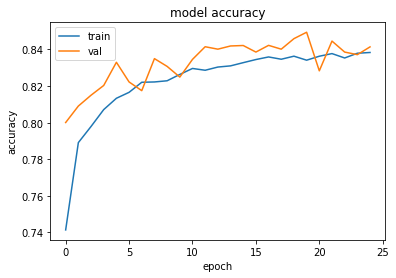

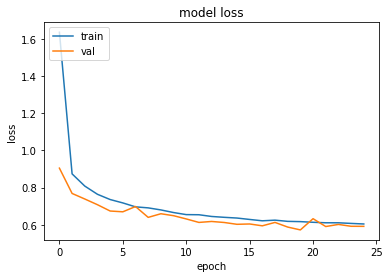


Time taken for training:51.39 seconds


In [ ]:

start_time=time.time()
history = model.fit(train_images, train_labels, epochs=25, validation_split = 0.2, batch_size=60, verbose =1)
training_time = time.time()-start_time

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


print("\nTime taken for training:{:5.2f} seconds".format(training_time))

**7. Model Evaluation (0.25 + 0.75 = 1 mark)**

a. Print the final test/validation loss and accuracy.

b. Print confusion matrix and classification report for the validation dataset Write a summary for the best and worst performing class and the overall trend.

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose = 0)

print("Test Loss: {:5.2f} ".format(test_loss))
print('Test accuracy: {:5.2f}\n'.format(test_acc))

test_labels_pred = model.predict(test_images)
test_labels_pred = np.argmax(test_labels_pred,axis=1)
print("Confusion Matrix:\n")
print(confusion_matrix(test_labels, test_labels_pred))

print("\n Classification Report:\n")

print(classification_report(test_labels, test_labels_pred))


Test Loss:  0.61 
Test accuracy:  0.83

Confusion Matrix:

[[862   0   3  50   3   1  67   0  14   0]
 [  3 940   7  42   4   0   3   0   1   0]
 [ 33   0 648  18 200   0  94   0   7   0]
 [ 40   8   1 869  41   0  37   0   4   0]
 [  1   0  66  34 841   0  56   0   2   0]
 [  0   0   0   1   0 825   0 106   5  63]
 [224   2  84  38 142   1 489   0  20   0]
 [  0   0   0   0   0   9   0 970   0  21]
 [  7   1   3   6   3   6  15   7 952   0]
 [  0   0   0   0   0   2   0  74   1 923]]

 Classification Report:

              precision    recall  f1-score   support

         0.0       0.74      0.86      0.79      1000
         1.0       0.99      0.94      0.96      1000
         2.0       0.80      0.65      0.72      1000
         3.0       0.82      0.87      0.84      1000
         4.0       0.68      0.84      0.75      1000
         5.0       0.98      0.82      0.89      1000
         6.0       0.64      0.49      0.56      1000
         7.0       0.84      0.97      0.90      10

**Summary:**
By looking at classification report, Class 8 has the highest F1 Score and Class 6 has lowest F1 Score. 

So we can say class 8 has most accurate classification and is the best performing clas. Class 6 has the worst performing class..

**Hyperparameter Tuning**- Build two more models by changing the following hyperparameters one at a time (0.5 + 0.5
= 1 mark)
Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the
instructions above for each additional model.
1. Dropout: Change the position and value of dropout layer
2. Batch Size: Change the value of batch size in model training


In [ ]:
#Alternate Model 1 by changing the dropout from layer 3 to layer 2 and changing the dropout from 0.4 to 0.25

model1 = keras.Sequential()
model1.add(keras.layers.Flatten(input_shape=(28,28)))
#Selected relu function at all layers which works best with deep neural networks.
model1.add(keras.layers.Dense(256, activation="relu", kernel_regularizer='L2'))
model1.add(keras.layers.Dropout(0.25))
model1.add(keras.layers.Dense(128, activation="relu", kernel_regularizer='L2'))
model1.add(keras.layers.Dense(64, activation="relu", kernel_regularizer='L2'))
model1.add(keras.layers.Dense(10))

model1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_46 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_47 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_______________________________________________

Epoch 1/25
800/800 [==============================] - 2s 3ms/step - loss: 1.6655 - accuracy: 0.7545 - val_loss: 0.8945 - val_accuracy: 0.8095
Epoch 2/25
800/800 [==============================] - 2s 3ms/step - loss: 0.8950 - accuracy: 0.7881 - val_loss: 0.8555 - val_accuracy: 0.7945
Epoch 3/25
800/800 [==============================] - 2s 2ms/step - loss: 0.8315 - accuracy: 0.7949 - val_loss: 0.8002 - val_accuracy: 0.8018
Epoch 4/25
800/800 [==============================] - 2s 2ms/step - loss: 0.8014 - accuracy: 0.7989 - val_loss: 0.7690 - val_accuracy: 0.8042
Epoch 5/25
800/800 [==============================] - 2s 3ms/step - loss: 0.7891 - accuracy: 0.7977 - val_loss: 0.7215 - val_accuracy: 0.8200
Epoch 6/25
800/800 [==============================] - 2s 3ms/step - loss: 0.7691 - accuracy: 0.8022 - val_loss: 0.7311 - val_accuracy: 0.8034
Epoch 7/25
800/800 [==============================] - 2s 3ms/step - loss: 0.7622 - accuracy: 0.7990 - val_loss: 0.7164 - val_accuracy: 0.8198
Epoch 

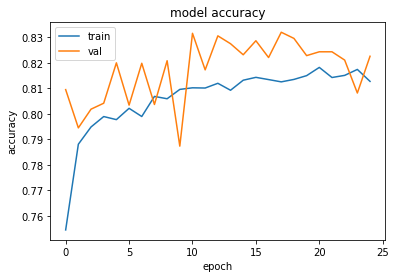

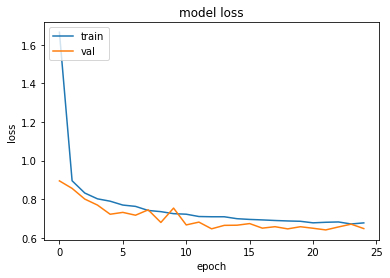


Time taken for training:50.88 seconds


In [ ]:
#a Compile the model, optimizer and accuracy as metrics

'''Adam optimizer is used. Unlike in stochastic gradient algo where learning rate remains fixed, in adam algoritm, learning rate adapts.  
Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the second 
moments of the gradients (the uncentered variance). Specifically, the algorithm calculates an exponential moving average of the gradient and 
the squared gradient, and the parameters beta1 and beta2 control the decay rates of these moving averages.
'''
#Default learning rate of 0.001
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

start_time=time.time()
history = model1.fit(train_images, train_labels, epochs=25, validation_split = 0.2, batch_size=60, verbose =1)
training_time = time.time()-start_time

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print("\nTime taken for training:{:5.2f} seconds".format(training_time))

In [ ]:
test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose = 0)

print("Test Loss: {:5.2f} ".format(test_loss))
print('Test accuracy: {:5.2f}\n'.format(test_acc))

test_labels_pred = model.predict(test_images)
test_labels_pred = np.argmax(test_labels_pred,axis=1)
print("Confusion Matrix:\n")
print(confusion_matrix(test_labels, test_labels_pred))

print("\n Classification Report:\n")

print(classification_report(test_labels, test_labels_pred))

Test Loss:  0.68 
Test accuracy:  0.81

Confusion Matrix:

[[862   0   3  50   3   1  67   0  14   0]
 [  3 940   7  42   4   0   3   0   1   0]
 [ 33   0 648  18 200   0  94   0   7   0]
 [ 40   8   1 869  41   0  37   0   4   0]
 [  1   0  66  34 841   0  56   0   2   0]
 [  0   0   0   1   0 825   0 106   5  63]
 [224   2  84  38 142   1 489   0  20   0]
 [  0   0   0   0   0   9   0 970   0  21]
 [  7   1   3   6   3   6  15   7 952   0]
 [  0   0   0   0   0   2   0  74   1 923]]

 Classification Report:

              precision    recall  f1-score   support

         0.0       0.74      0.86      0.79      1000
         1.0       0.99      0.94      0.96      1000
         2.0       0.80      0.65      0.72      1000
         3.0       0.82      0.87      0.84      1000
         4.0       0.68      0.84      0.75      1000
         5.0       0.98      0.82      0.89      1000
         6.0       0.64      0.49      0.56      1000
         7.0       0.84      0.97      0.90      10

In [ ]:
#Alternate Model 2 by changing the batch size from 60 to 100 

model2 = keras.Sequential()
model2.add(keras.layers.Flatten(input_shape=(28,28)))
#Selected relu function at all layers which works best with deep neural networks.
model2.add(keras.layers.Dense(256, activation="relu", kernel_regularizer='L2'))
model2.add(keras.layers.Dense(128, activation="relu", kernel_regularizer='L2'))
model2.add(keras.layers.Dropout(0.4))
model2.add(keras.layers.Dense(64, activation="relu", kernel_regularizer='L2'))
model2.add(keras.layers.Dense(10))

model2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_49 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_51 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_______________________________________________

Epoch 1/25
480/480 [==============================] - 1s 3ms/step - loss: 1.9157 - accuracy: 0.7430 - val_loss: 0.9475 - val_accuracy: 0.7937
Epoch 2/25
480/480 [==============================] - 1s 3ms/step - loss: 0.9088 - accuracy: 0.7952 - val_loss: 0.7912 - val_accuracy: 0.8192
Epoch 3/25
480/480 [==============================] - 1s 3ms/step - loss: 0.8285 - accuracy: 0.8003 - val_loss: 0.7620 - val_accuracy: 0.8228
Epoch 4/25
480/480 [==============================] - 1s 3ms/step - loss: 0.7875 - accuracy: 0.8081 - val_loss: 0.7323 - val_accuracy: 0.8270
Epoch 5/25
480/480 [==============================] - 1s 3ms/step - loss: 0.7568 - accuracy: 0.8141 - val_loss: 0.7057 - val_accuracy: 0.8282
Epoch 6/25
480/480 [==============================] - 1s 3ms/step - loss: 0.7291 - accuracy: 0.8194 - val_loss: 0.6885 - val_accuracy: 0.8326
Epoch 7/25
480/480 [==============================] - 1s 3ms/step - loss: 0.7148 - accuracy: 0.8229 - val_loss: 0.6840 - val_accuracy: 0.8278
Epoch 

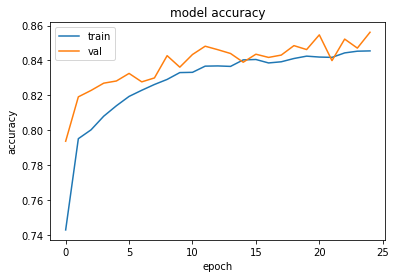

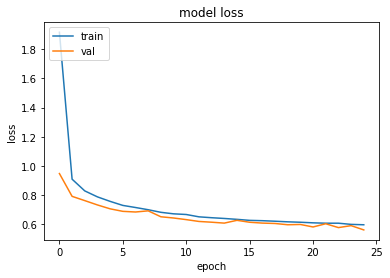


Time taken for training:32.65 seconds


In [ ]:
#a Compile the model, optimizer and accuracy as metrics

'''Adam optimizer is used. Unlike in stochastic gradient algo where learning rate remains fixed, in adam algoritm, learning rate adapts.  
Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the second 
moments of the gradients (the uncentered variance). Specifically, the algorithm calculates an exponential moving average of the gradient and 
the squared gradient, and the parameters beta1 and beta2 control the decay rates of these moving averages.
'''
#Default learning rate of 0.001
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

start_time=time.time()
#Changed batch size from 60 to 100. Rest everything remains same.
history = model2.fit(train_images, train_labels, epochs=25, validation_split = 0.2, batch_size=100, verbose =1)
training_time = time.time()-start_time

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print("\nTime taken for training:{:5.2f} seconds".format(training_time))

In [ ]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose = 0)

print("Test Loss: {:5.2f} ".format(test_loss))
print('Test accuracy: {:5.2f}\n'.format(test_acc))

test_labels_pred = model.predict(test_images)
test_labels_pred = np.argmax(test_labels_pred,axis=1)
print("Confusion Matrix:\n")
print(confusion_matrix(test_labels, test_labels_pred))

print("\n Classification Report:\n")

print(classification_report(test_labels, test_labels_pred))

Test Loss:  0.59 
Test accuracy:  0.84

Confusion Matrix:

[[862   0   3  50   3   1  67   0  14   0]
 [  3 940   7  42   4   0   3   0   1   0]
 [ 33   0 648  18 200   0  94   0   7   0]
 [ 40   8   1 869  41   0  37   0   4   0]
 [  1   0  66  34 841   0  56   0   2   0]
 [  0   0   0   1   0 825   0 106   5  63]
 [224   2  84  38 142   1 489   0  20   0]
 [  0   0   0   0   0   9   0 970   0  21]
 [  7   1   3   6   3   6  15   7 952   0]
 [  0   0   0   0   0   2   0  74   1 923]]

 Classification Report:

              precision    recall  f1-score   support

         0.0       0.74      0.86      0.79      1000
         1.0       0.99      0.94      0.96      1000
         2.0       0.80      0.65      0.72      1000
         3.0       0.82      0.87      0.84      1000
         4.0       0.68      0.84      0.75      1000
         5.0       0.98      0.82      0.89      1000
         6.0       0.64      0.49      0.56      1000
         7.0       0.84      0.97      0.90      10

**Summary:**

Original Model and Hpyerparameter tuned model based on batch size accuracy and loss is almost equal. 

However on changing the dropout the accuracy decreased from 0.84 to 0.81. 

State of art model accuracy is more than 0.9 which can be achieved using more advanced models like CNN.